In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# LA County FIPs: 06037

In [53]:
LA20_Raw = "Multiple Cause of Death, 1999-2020_LA_County.txt"
LA21_Raw = "Multiple Cause of Death, 2018-2021_LA_County.txt"

In [54]:
LA20_Raw_Data = pd.read_csv(LA20_Raw, sep='\t', skipfooter=73, engine='python')
LA21_Raw_Data = pd.read_csv(LA21_Raw, sep='\t', skipfooter=55, engine='python')


In [55]:
def filter_years(df):
    df = df[df['Year'] == 2021]
    return df

LA21_Raw_Data = filter_years(LA21_Raw_Data)

In [56]:
LA21_Raw_Data['socioec quintile'] = 4.0
LA20_Raw_Data['socioec quintile'] = 4.0

In [57]:
race_map = {'White':'White', 'American Indian or Alaska Native':'American Indian or Alaska Native',   
           'Black or African American':'Black or African American', 
            'Native Hawaiian or Other Pacific Islander':'Asian or Pacific Islander',
            'Asian':'Asian or Pacific Islander',
            'More than one race': 'More than one race',
           }
race_code_map = {'2106-3':'2106-3', '1002-5': '1002-5',  
                '2054-5': '2054-5', 
                 'NHOPI':'A-PI',
                 'A':'A-PI',
                 'M':'M',
                }

In [58]:
LA21_Raw_Data['Race'] = LA21_Raw_Data['Single Race 6'].map(race_map)
LA21_Raw_Data['Race Code'] = LA21_Raw_Data['Single Race 6 Code'].map(race_code_map)

In [59]:
LA21_Raw_Data.drop(columns=['Single Race 6', 'Single Race 6 Code'], inplace=True)

In [60]:
combined_datasets_list = [LA21_Raw_Data, LA20_Raw_Data]

combined_datasets = pd.concat(combined_datasets_list)

In [61]:
## Drop "Not Applicable" Rows:
combined_datasets = combined_datasets[combined_datasets['Population'] != 'Not Applicable']
combined_datasets["Population"] = pd.to_numeric(combined_datasets["Population"], errors='coerce')

## Replace "Suppressed" with 5 deaths
combined_datasets['Crude Rate'] = np.where(combined_datasets["Crude Rate"] == 'Suppressed', 
                              (5 / combined_datasets["Population"]) * 100000, 
                              combined_datasets["Crude Rate"])
combined_datasets.loc[combined_datasets["Deaths"] == 'Suppressed', "Deaths"] = 5

print(len(combined_datasets))

365


In [62]:
# There are no complete duplicates in the dataset, based on all columns
print(len(combined_datasets))
print(len(combined_datasets.drop_duplicates()))
combined_datasets.drop_duplicates(inplace=False)

365
364


,Notes,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile,Race,Race Code
24,NaN,Heroin,T40.1,2021.0,2021.0,Male,M,25-29 years,25-29,17.0,271509.0,Unreliable,4.0,White,2106-3
25,NaN,Heroin,T40.1,2021.0,2021.0,Male,M,30-34 years,30-34,23.0,288549.0,8.0,4.0,White,2106-3
26,NaN,Heroin,T40.1,2021.0,2021.0,Male,M,35-39 years,35-39,15.0,263352.0,Unreliable,4.0,White,2106-3
27,NaN,Heroin,T40.1,2021.0,2021.0,Male,M,45-49 years,45-49,12.0,230527.0,Unreliable,4.0,White,2106-3
28,NaN,Heroin,T40.1,2021.0,2021.0,Male,M,50-54 years,50-54,12.0,240500.0,Unreliable,4.0,White,2106-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Show Totals: Disabled,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,4.0,None,None
322,Show Zero Values: False,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,4.0,None,None
323,Show Suppressed: False,None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,4.0,None,None
324,"Calculate Rates Per: 100,000",None,None,NaN,NaN,None,None,None,None,NaN,NaN,None,4.0,None,None


In [63]:
field = []
count_nulls = []
percent_nulls = []
for (value, column) in zip(combined_datasets.isnull().sum(), combined_datasets.isnull().columns):
    field.append(column)
    count_nulls.append(value)
    percent_nulls.append(value/len(combined_datasets))

pd.DataFrame(zip(field, count_nulls, percent_nulls), columns = ["Field", "Count of Nulls", "Percent of Total"])

,Field,Count of Nulls,Percent of Total
0,Notes,352,0.964384
1,Multiple Cause of death,13,0.035616
2,Multiple Cause of death Code,13,0.035616
3,Year,13,0.035616
4,Year Code,13,0.035616
5,Gender,13,0.035616
6,Gender Code,13,0.035616
7,Five-Year Age Groups,13,0.035616
8,Five-Year Age Groups Code,13,0.035616
9,Deaths,13,0.035616


In [64]:
cleaned = combined_datasets[(combined_datasets['Deaths'].isnull() == False) & (combined_datasets['Crude Rate'].isnull() == False)]
cleaned.drop(columns=['Notes'], inplace=True)

/var/folders/yl/zy_202992md5vzz6c5thvp6w0000gr/T/ipykernel_32361/728463618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.drop(columns=['Notes'], inplace=True)


In [65]:
# Define a function to calculate the midpoint of a range
def calculate_midpoint(range_str):
    if range_str == '< 1':
        return 0.5  # Assuming "< 1" corresponds to 0.5 as midpoint
    start, end = map(int, range_str.split('-'))
    return (start + end) / 2


def clean_up_age(df):
    """
    Fix the dates in the Five-Year Age Groups Code column
    Add an extra variable of ‘midpoint for age group’
    """
    cleaned = df.copy()
    print(f"current unique values in five year age code groups code column: {cleaned['Five-Year Age Groups Code'].unique()}")
    cleaned['Five-Year Age Groups Code'] = cleaned['Five-Year Age Groups'].str.extract(r'(\d+-\d+|< 1)')
    print(f"new unique values in five year age code groups code column: {cleaned['Five-Year Age Groups Code'].unique()}")
    
    # Apply the function to create a new column
    cleaned['age_midpoint'] = cleaned['Five-Year Age Groups Code'].apply(calculate_midpoint)

    print(f"new unique values with the age midpoint: {cleaned['age_midpoint'].unique()}")
    return cleaned

In [66]:
age_cleaned = clean_up_age(cleaned)

current unique values in five year age code groups code column: ['25-29' '30-34' '35-39' '45-49' '50-54' '55-59' '60-64' '65-69' '40-44'
 '15-19' '20-24']
new unique values in five year age code groups code column: ['25-29' '30-34' '35-39' '45-49' '50-54' '55-59' '60-64' '65-69' '40-44'
 '15-19' '20-24']
new unique values with the age midpoint: [27. 32. 37. 47. 52. 57. 62. 67. 42. 17. 22.]


In [67]:
age_cleaned.to_csv('cleaned_wonder_LA_County_2021.csv', index=False)

In [68]:
age_cleaned["Crude Rate"] = pd.to_numeric(age_cleaned["Crude Rate"], errors='coerce')
age_cleaned["Deaths"] = pd.to_numeric(age_cleaned["Deaths"], errors='coerce')

In [69]:
print(age_cleaned['Crude Rate'].mean())
print(age_cleaned['Crude Rate'].sum())

16.62803738317757
1779.2


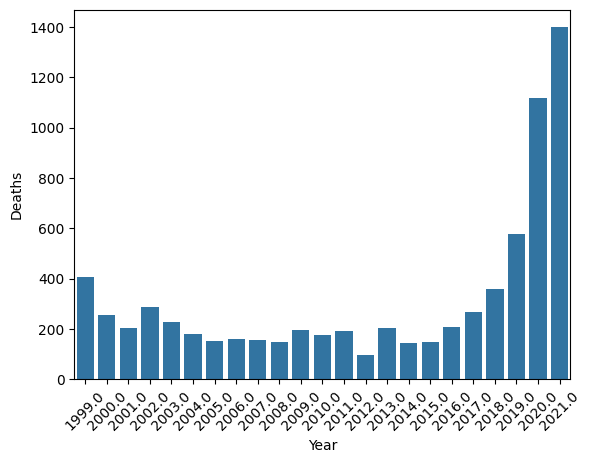

In [70]:
# Sum of Deaths over time
deaths_sum = age_cleaned.groupby(['Year'])['Deaths'].sum().reset_index()

bar_deaths = sns.barplot(data=deaths_sum, x='Year', y='Deaths')

for item in bar_deaths.get_xticklabels():
    item.set_rotation(45)

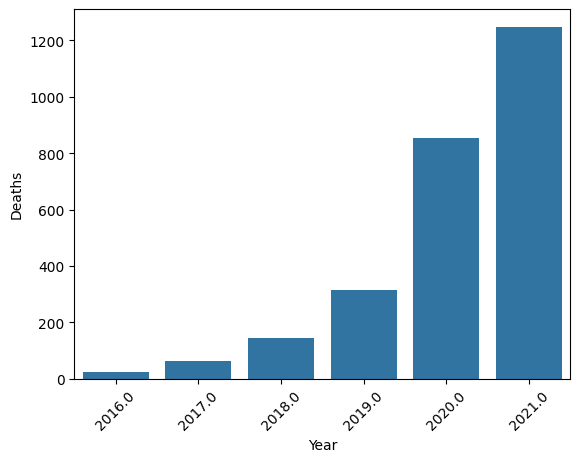

In [71]:
# Sum of Deaths over time, fentanyl
df_old_plus_2021_fentanyl = age_cleaned[age_cleaned['Multiple Cause of death'] == 'Other synthetic narcotics']
deaths_sum_f = df_old_plus_2021_fentanyl.groupby(['Year'])['Deaths'].sum().reset_index()

bar_deaths = sns.barplot(data=deaths_sum_f, x='Year', y='Deaths')

for item in bar_deaths.get_xticklabels():
    item.set_rotation(45)

In [72]:
crude_rate_mean = age_cleaned.groupby(['Year', 'Multiple Cause of death'])['Crude Rate'].mean().reset_index()

[Text(0.5, 1.0, 'Multiple COD Over Time - LA County')]

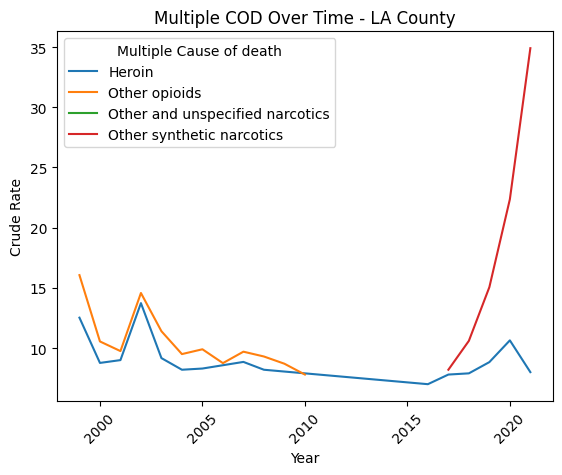

In [74]:
# Sum of Deaths over time
COD_Code = sns.lineplot(data=crude_rate_mean, x='Year', y='Crude Rate', hue='Multiple Cause of death')

for item in COD_Code.get_xticklabels():
    item.set_rotation(45)
title = 'Multiple COD Over Time - LA County'

COD_Code.set(title=title)